# **Football Premier League 2019-2020 Striker Position Statistics**

Nicolas Labarca and Oliver Sanger

Website: [PremierLeagueFootballstats.github.io](premierleaguefootballstats.github.io/)

# 1. Introduction


# Project Goals:

Our goal is to figure out if 2019/2020 soccer premier league strikers have improved into the 2022/2023 season. If the player was chnaged or sold and they have a new player filling that posistion we will analyze if the selling of the previous striker was good or not comparing them.

# Project Dataset:

This dataset is ideal for football fans and data scientists looking to understand player performance in the Premier League. The dataset reveals the full picture on each player’s stats by various metrics and lets us see performance in all phases of the game — scoring, assists, and overall team contributions.
Dataset: The data contains:
Rank: Player rank on the basis of performance metrics.
Player: Name of the player.
Club: The club that the player plays for.
GP (Games Played): Amount of games played by the player.
GS (Games Started): The number of games the player started.
MIN (Minutes Played): How many minutes played by the player during the current game.
G (Goals): Total Goals scored by the player.
ASST (Assists): All assists made by the player.
APPROVALS: The amount of shots obtained.
SOG (Shots on Goal): Total number of on-target shots.
The information also enables individual player-level analysis of performance across multiple seasons. You can look at the effect of different aspects of a player’s performance – games played, minutes on the field, shots on goal, and so forth – on the team’s performance. This allows deeper dives on issues like: Which players have the biggest impact in terms of key performance metrics such as goals and assists? ; How do these stats translate to team's league record?
The Premier League Player Stats dataset can be applied to:
Check player performances across seasons.
Compare the effectiveness of strikers, midfielders and defenders according to what they bring to the table.
Find out which players are not well-priced in the transfer market based on statistical results.
Conduct predictive modeling to estimate which players are destined to thrive over the coming seasons.


# Collaboration Plan:

Our Collaboration plan is to at least meet up in person 2 times a week to work on the final project. In the event that one of us cannot meet in person we will meet up through zoom. From now to November 15th we will be working on Milestone 2, in which we will add the other datasets (We still don’t know how many more we will add, it depends on the size of the datasets and information it contains) and we will filter it out as we did for the first dataset and then we will melt or graph the data together to have a better comparison. By December 12, we will have sour data organized in a nice visual form to present and fine tune everything.

# ETL (Extraction, Transform, and Load):

We loaded a Premier League player stats data set (from MSN Sports), where individual player stats can be displayed. This dataset contains the name, team, games played (GP), games started (GS), minutes played (MIN), goals (G), assists (ASST), shots (SHOTS) and shots on goal (SOG). The set consists of essential metrics for the player to measure across the game's various areas.
The underlying dataset contained columns for every performance indicator sorted by player rank. We cleaned up the data in order to better organise the data for analysis and ensure each player’s stats were placed under corresponding columns for seasons. This enables us to easily look at player-level trends and then do further analyses such as grading players based on number of goals or assists, or linking individual stats to team performance.
The dataset is open for analysis, allowing analysts to consider some of the most pressing questions such as who were the most effective players in the Premier League, what were the seasons patterns, and run predictive modeling to predict how players will fare in the future.





In [ ]:
import pandas as pd

Strikers2019_df = pd.read_csv('Premier League Player Stats.csv')

#filter out all players with less than 5 shots
Strikers2019_df = Strikers2019_df[Strikers2019_df['SHOTS'] >= 5]


# **2019/2020 Strikers Organization**

This code organizes our data so we have some measurable variables. Using the variables provided, shots on goal(SOG), shots(SHOTS), goals(G), and games played(GP), we created three new variables to help us rank our 2019/2020 strikers.

In [ ]:
# Calculate new metrics and assign them to new columns
Strikers2019_df['Shooting_Accuracy'] = Strikers2019_df.apply(lambda row: row['SOG'] / row['SHOTS'] if row['SHOTS'] != 0 else 0, axis=1)
Strikers2019_df['Goal_Conversion'] = Strikers2019_df.apply(lambda row: row['G'] / row['SOG'] if row['SOG'] != 0 else 0, axis=1)
Strikers2019_df['Goal_Per_Game'] = Strikers2019_df.apply(lambda row: row['G'] / row['GP'] if row['GP'] != 0 else 0, axis=1)


Strikers2019_df

,Rank,PLAYER,TEAM,GP,GS,MIN,G,ASST,SHOTS,SOG,Shooting_Accuracy,Goal_Conversion,Goal_Per_Game
0,1,Jamie Vardy,Leicester City,35,34,3034,23,5,71,43,0.605634,0.534884,0.657143
1,2,Danny Ings,Southampton,38,32,2812,22,2,66,38,0.575758,0.578947,0.578947
2,3,Pierre-Emerick Aubameyang,Arsenal,36,35,3138,22,3,70,42,0.600000,0.523810,0.611111
3,4,Raheem Shaquille Sterling,Manchester City,33,30,2660,20,1,68,38,0.558824,0.526316,0.606061
4,5,Mohamed Salah Ghaly,Liverpool,34,33,2884,19,10,95,59,0.621053,0.322034,0.558824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430,Arnaut Danjuma Groeneveld,Bournemouth,14,6,628,0,0,11,4,0.363636,0.000000,0.000000
431,432,Reece James,Chelsea,24,16,1513,0,2,12,3,0.250000,0.000000,0.000000
453,454,Shkodran Mustafi,Arsenal,15,13,1205,0,1,9,4,0.444444,0.000000,0.000000
482,483,Takumi Minamino,Liverpool,10,2,242,0,0,5,2,0.400000,0.000000,0.000000


# **Ranking and Displaying 2019/2020 Premier League Strikers**

This code organizes our data a little bit further, seperating strikers into different group rankings. These groups are ranked based off of goals_per_game which is a very important variable for attacking football players. This ranking will also be reflected in the goal_conversion and shooting_accuracy, as both variables are coordinated with goals_per_game. Then we finally display all three ranks by goal_per_game in descending order.

In [ ]:
import pandas as pd

# Create a new DataFrame with only the relevant columns
pl_gpg_ranked = Strikers2019_df[['Goal_Per_Game','PLAYER', 'TEAM', 'GP', 'G']].copy()

pl_accuracy_ranked = Strikers2019_df[['Shooting_Accuracy','PLAYER', 'TEAM', 'GP', 'SHOTS', 'SOG']].copy()

pl_goal_percent_ranked = Strikers2019_df[['Goal_Conversion','PLAYER', 'TEAM', 'GP', 'G', 'SOG']].copy()

# Sort the DataFrames in descending order
pl_gpg_ranked_sorted = pl_gpg_ranked.sort_values('Goal_Per_Game', ascending=False)
pl_accuracy_ranked_sorted = pl_accuracy_ranked.sort_values('Shooting_Accuracy', ascending=False)
pl_goal_percent_ranked_sorted = pl_goal_percent_ranked.sort_values('Goal_Conversion', ascending=False)

# Display the sorted DataFrames
pl_gpg_ranked_sorted
#pl_accuracy_ranked_sorted
#pl_goal_percent_ranked_sorted


,Goal_Per_Game,PLAYER,TEAM,GP,G
10,0.666667,Sergio Leonel Agüero del Castillo,Manchester City,24,16
0,0.657143,Jamie Vardy,Leicester City,35,23
6,0.620690,Harry Kane,Tottenham Hotspur,29,18
2,0.611111,Pierre-Emerick Aubameyang,Arsenal,36,22
3,0.606061,Raheem Shaquille Sterling,Manchester City,33,20
...,...,...,...,...,...
308,0.000000,Scott Dann,Crystal Palace,16,0
312,0.000000,James McArthur,Crystal Palace,37,0
313,0.000000,James McCarthy,Crystal Palace,33,0
320,0.000000,Eric Dier,Tottenham Hotspur,19,0


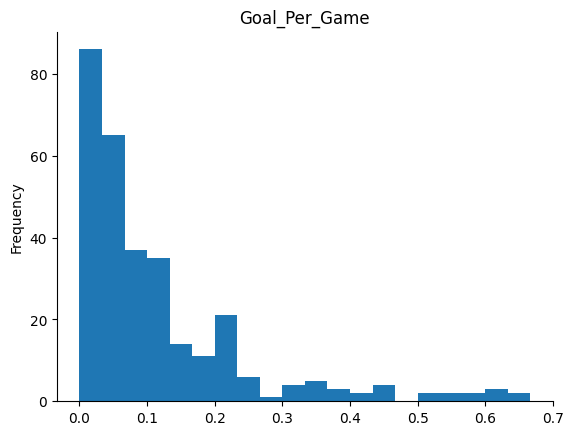

In [ ]:
from matplotlib import pyplot as plt
pl_gpg_ranked_sorted['Goal_Per_Game'].plot(kind='hist', bins=20, title='Goal_Per_Game')
plt.gca().spines[['top', 'right',]].set_visible(False)


The chart displays the distribution of Goal_Per_Game, skewing to the right, with the majority of values clustered between 0 and 0.2. This indicates that most players have an average of fewer than 0.2 goals per game, while a small number of players have higher averages.


#**Introducing New Data Sets**

#**La Liga Forward Data**

For this analysis, I used a dataset of La Liga stats for forwards to analyse their offensive efficiency. I began by loading the data and filtering only for players in the "Forward" position because that is what they play for, to score goals. I then ran the stats using Shooting Accuracy, where I counted how many shots came off the mark, Goal Conversion, to see how well players converted those on-target shots into goals, and Goals Per Game, or how many goals each player had averaged in each match. In order to keep the analysis simple, I created DataFrames for each metric and stored only the relevant columns. I then ranked these DataFrames by player, so it’s easy to identify the top performers for each score. Last, I plotted the distributions of these metrics using histograms, which gave me a good sense of how performance was distributed across the league. I also scuffed the plots, tearing out the top and right spines for a more professional look. In the long run, this way allowed me to both classify the players well and get an overall picture of La Liga’s overall averaged scoring efficiency.

In [ ]:
import pandas as pd

# Load the dataset
laliga_df = pd.read_csv('laliga_player_stats_english.csv')
laliga_df = laliga_df[laliga_df['Shots'] >= 5]

# Filter for players in the 'Forward' position and create a copy
forward_df = laliga_df.loc[laliga_df['Position'] == 'Forward'].copy()

# Calculate new metrics and assign them to new columns
forward_df['Shooting_Accuracy'] = forward_df.apply(lambda row: row['Shots on target'] / row['Shots'] if row['Shots'] != 0 else 0, axis=1)
forward_df['Goal_Conversion'] = forward_df.apply(lambda row: row['Goals scored'] / row['Shots on target'] if row['Shots on target'] != 0 else 0, axis=1)
forward_df['Goals_Per_Game'] = forward_df.apply(lambda row: row['Goals scored'] / row['Games played'] if row['Games played'] != 0 else 0, axis=1)

# Display the resulting DataFrame
forward_df

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt,Shooting_Accuracy,Goal_Conversion,Goals_Per_Game
26,Athletic Club,Forward,9.0,Williams,3.036,38,100.00%,19,50.00%,36,...,272,177,686.000,666.000,12,8,7,0.589286,0.393939,0.342105
27,Athletic Club,Forward,10.0,Muniain,2.385,34,89.00%,16,42.00%,27,...,308,36,1.187,1.126,51,10,6,0.600000,0.583333,0.205882
28,Athletic Club,Forward,20.0,Aduriz,941.000,20,53.00%,4,11.00%,10,...,55,112,230.000,227.000,3,0,1,0.578947,0.181818,0.100000
54,Atlético de Madrid,Forward,7.0,Griezmann,3.202,37,97.00%,31,82.00%,37,...,190,99,1.388,1.287,79,22,6,0.534884,0.326087,0.405405
55,Atlético de Madrid,Forward,9.0,Kalinić,639.000,17,45.00%,0,0.00%,7,...,38,38,107.000,106.000,1,0,2,0.833333,0.400000,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Valencia CF,Forward,22.0,S. Mina,1.858,30,79.00%,9,24.00%,23,...,192,118,463.000,436.000,24,3,3,0.578947,0.318182,0.233333
528,Valencia CF,Forward,23.0,Sobrino,1.155,24,63.00%,4,11.00%,12,...,128,90,281.000,270.000,10,1,2,0.315789,0.500000,0.125000
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,92.00%,16,42.00%,25,...,219,125,740.000,676.000,59,5,6,0.611111,0.242424,0.228571
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,87.00%,2,5.00%,12,...,80,47,270.000,252.000,16,2,5,0.681818,0.400000,0.181818


The table and code concentrate on examining forwards based on key performance metrics like Goals_Per_Game, Shooting_Accuracy, and Goal_Conversion, showcasing their scoring efficiency and accuracy. Sorting each metric in a descending order allows me to determine which players make the most of their chances on the field. An example is when high Goal_Conversion rates show players who consistently convert chances into goals, while Shooting_Accuracy indicates those who regularly hit the target. The table includes additional information such as number of games played and passing statistics to assess overall participation. This evaluation helps to pinpoint not only top scorers but also those who are highly effective, offering valuable information for strategic choices.

In [ ]:

# Create a new DataFrame with only the relevant columns
ll_gpg_ranked = forward_df[['Goals_Per_Game', 'Name', 'Team', 'Games played', 'Goals scored']].copy()
ll_accuracy_ranked = forward_df[['Shooting_Accuracy', 'Name', 'Team', 'Games played', 'Shots', 'Shots on target']].copy()
ll_goal_percent_ranked = forward_df[['Goal_Conversion', 'Name', 'Team', 'Games played', 'Goals scored', 'Shots on target']].copy()

# Sort the DataFrames in descending order
ll_gpg_ranked_sorted = ll_gpg_ranked.sort_values('Goals_Per_Game', ascending=False)
ll_accuracy_ranked_sorted = ll_accuracy_ranked.sort_values('Shooting_Accuracy', ascending=False)
ll_goal_percent_ranked_sorted = ll_goal_percent_ranked.sort_values('Goal_Conversion', ascending=False)

# Display the sorted DataFrames
#ll_gpg_ranked_sorted
#ll_accuracy_ranked_sorted
ll_goal_percent_ranked_sorted

,Goal_Conversion,Name,Team,Games played,Goals scored,Shots on target
307,0.606061,Iago Aspas,RC Celta,27,20,33
165,0.583333,Jorge Molina,Getafe CF,38,14,24
27,0.583333,Muniain,Athletic Club,34,7,12
163,0.560000,Mata,Getafe CF,34,14,25
113,0.500000,Burgui,D. Alavés,16,1,2
...,...,...,...,...,...,...
87,0.000000,Sabin Merino,CD Leganés,12,0,4
249,0.000000,Duje Cop,R. Valladolid CF,18,0,5
430,0.000000,Sandro,Real Sociedad,24,0,12
110,0.000000,Rolan,D. Alavés,15,0,2


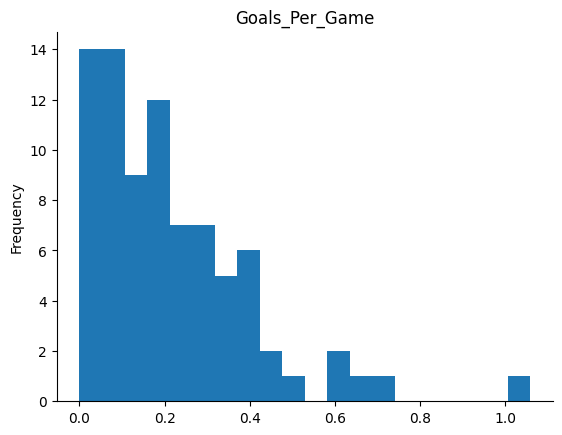

In [ ]:
from matplotlib import pyplot as plt
ll_gpg_ranked_sorted['Goals_Per_Game'].plot(kind='hist', bins=20, title='Goals_Per_Game')
plt.gca().spines[['top', 'right',]].set_visible(False)

#**Serie A Tim Forward Data**

Here I looked at Serie A forwards’ 2019-2020 season performances based on their efficiency in goalscoring and accuracy. I started with loading the data and grouping forwards, because they’re typically the primary contributors to a team’s goals. Afterwards, I averaged three key statistics: Shooting Accuracy, where we calculate how many of the shots went on target; Goal Conversion, where we calculate how well players converted those shots into goals; and Goals Per Game, which indicates how many goals each player averaged per game. These stats allowed me to evaluate all areas of player performance, from accuracy to finishing to scoring percentage.
For better visualization, I made individual DataFrames for each metric, and added the relevant columns such as player name, team, and calculated metric. I then sorted these DataFrames into categories to rank the players, so it was simple to identify the best performers for each category. Players who converted more goals, for example, were selected, as well as those who averaged more goals per game.
I also portrayed distributions of these measures with histograms to make it easier to see how players performed on a per-player basis. Such plots allowed me to identify general patterns – whether the majority of players were equally accurate, for example, or if there were some oddballs. I cleared the plots by stripping the spines at the top and right, to make them look neater and more professional. It enabled me to get a true picture of how Serie A forwards operated in goal-scoring efficiency and draw conclusions both about individual players and the league.


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the Serie A dataset
serie_a_df = pd.read_csv('2019-2020_SerieATim_Player 2.csv')
seria_a_df = serie_a_df[serie_a_df['Sh'] >= 5]

# Filter for forwards (FW) using .copy() to create an explicit copy
serie_a_forwards = serie_a_df.loc[serie_a_df['Pos'] == 'FW'].copy()

# Calculate new metrics using .loc for assignment
serie_a_forwards.loc[:, 'Shooting_Accuracy'] = serie_a_forwards.apply(lambda row: row['SoT'] / row['Sh'] if row['Sh'] != 0 else 0, axis=1)
serie_a_forwards.loc[:, 'Goal_Conversion'] = serie_a_forwards.apply(lambda row: row['Gls'] / row['SoT'] if row['SoT'] != 0 else 0, axis=1)
serie_a_forwards.loc[:, 'Goals_Per_Game'] = serie_a_forwards.apply(lambda row: row['Gls'] / row['MP'] if row['MP'] != 0 else 0, axis=1)

# Display the resulting DataFrame
serie_a_forwards

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,MP,Shooting_Accuracy,Goal_Conversion,Goals_Per_Game
1,2,Bobby Adekanye,nl NED,FW,Lazio,20,1999,2.1,1,5,...,0,1.4,1.4,0.27,-0.4,-0.4,11,0.800000,0.250000,0.090909
25,26,Khouma Babacar,sn SEN,FW,Lecce,26,1993,15.8,3,47,...,2,6.6,4.9,0.10,-3.6,-1.9,25,0.340426,0.187500,0.120000
28,29,Mario Balotelli,it ITA,FW,Brescia,28,1990,15.6,5,72,...,0,7.1,7.1,0.10,-2.1,-2.1,19,0.347222,0.200000,0.263158
45,46,Andrea Belotti,it ITA,FW,Torino,25,1993,33.4,16,96,...,8,16.7,10.5,0.11,-0.7,-1.5,36,0.343750,0.484848,0.444444
50,51,Domenico Berardi,it ITA,FW,Sassuolo,24,1994,27.7,14,117,...,3,10.7,8.4,0.07,3.3,3.6,31,0.376068,0.318182,0.451613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,561,Cengiz Ünder,tr TUR,FW,Roma,22,1997,9.7,3,27,...,0,2.0,2.0,0.07,1.0,1.0,18,0.333333,0.333333,0.166667
578,579,Dušan Vlahović,rs SRB,FW,Fiorentina,19,2000,16.7,6,64,...,1,7.0,6.2,0.10,-1.0,-1.2,30,0.265625,0.352941,0.200000
580,581,Giacomo Vrioni,al ALB,FW,Juventus,20,1998,0.1,0,1,...,0,0.4,0.4,0.39,-0.4,-0.4,1,0.000000,0.000000,0.000000
591,592,Duván Zapata,co COL,FW,Atalanta,28,1991,22.5,18,88,...,1,15.6,14.8,0.17,2.4,2.2,28,0.409091,0.500000,0.642857


The code evaluates Serie A attackers from the 2019-2020 season by computing important performance measures like Shooting Accuracy, Goal Conversion, and Goals Per Game. It initially screens players with a minimum of five shots and separates forwards to concentrate on offensive players. Shooting Accuracy assesses the portion of shots that hit the target, whereas Goal Conversion analyzes the effectiveness of turning those on-target shots into goals. Goals Per Game offers a glimpse into how often goals are scored in relation to time spent on the field. The DataFrame shows players' efficiency, with Bobby Adekanye having high accuracy but low conversion rates, and Domenico Berardi effectively balancing both metrics. This examination identifies which players are the most reliable scorers and highlights areas for potential enhancement.

In [ ]:
# Create a new DataFrame with only the relevant columns
sa_gpg_ranked = serie_a_forwards[['Goals_Per_Game', 'Player', 'Squad', 'MP', 'Gls']].copy()
sa_accuracy_ranked = serie_a_forwards[['Shooting_Accuracy', 'Player', 'Squad', 'MP', 'Sh', 'SoT']].copy()
sa_goal_percent_ranked = serie_a_forwards[['Goal_Conversion', 'Player', 'Squad', 'MP', 'Gls', 'SoT']].copy()

# Sort the DataFrames in descending order
sa_gpg_ranked_sorted = sa_gpg_ranked.sort_values('Goals_Per_Game', ascending=False)
sa_accuracy_ranked_sorted = sa_accuracy_ranked.sort_values('Shooting_Accuracy', ascending=False)
sa_goal_percent_ranked_sorted = sa_goal_percent_ranked.sort_values('Goal_Conversion', ascending=False)

# Display the sorted DataFrames
sa_gpg_ranked_sorted
#sa_accuracy_ranked_sorted
#sa_goal_percent_ranked_sorted


,Goals_Per_Game,Player,Squad,MP,Gls
254,0.972973,Ciro Immobile,Lazio,37,36
477,0.939394,Cristiano Ronaldo,Juventus,33,31
591,0.642857,Duván Zapata,Atalanta,28,18
319,0.638889,Romelu Lukaku,Inter,36,23
95,0.583333,Francesco Caputo,Sassuolo,36,21
...,...,...,...,...,...
370,0.000000,Raúl Moro,Lazio,1,0
392,0.000000,Marco Olivieri,Juventus,3,0
434,0.000000,Roberto Piccoli,Atalanta,1,0
400,0.000000,Alberto Paloschi,SPAL,10,0


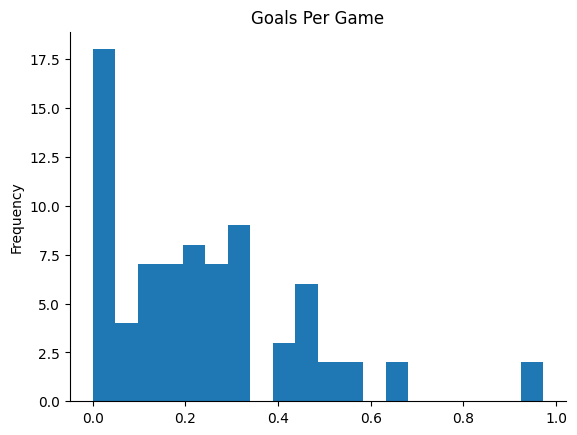

In [ ]:
from matplotlib import pyplot as plt
sa_gpg_ranked_sorted['Goals_Per_Game'].plot(kind='hist', bins=20, title='Goals Per Game')
plt.gca().spines[['top', 'right',]].set_visible(False)

#**Joining Premier League, La Liga, and Serie A**

The code evaluates and orders strikers by merging information from the Premier League, La Liga, and Serie A to calculate goal-scoring effectiveness, providing a summary of Goals_Per_Game performance across the leading European competitions. Firstly, every dataset contains a League column to group players according to their leagues. Combining the data sets results in a single DataFrame containing key columns: PLAYER, League, and Goal_Per_Game. When you organize the combined DataFrame by Goals_Per_Game in descending order, you can identify the top 50 forwards, including Messi (La Liga), Immobile (Serie A), and Ronaldo (Serie A) as some of the highest performers. These athletes demonstrate exceptional skill in scoring efficiently, often contributing significantly to their team's offensive output.


In [ ]:
# Add league column to each DataFrame
Strikers2019_df['League'] = 'Premier League'
forward_df['League'] = 'La Liga'
serie_a_forwards['League'] = 'Serie A'

gpg_combined_df = pd.concat([
    Strikers2019_df[['PLAYER', 'League', 'Goal_Per_Game']],
    forward_df[['Name', 'League', 'Goals_Per_Game']].rename(columns={'Name': 'PLAYER', 'Goals_Per_Game': 'Goal_Per_Game'}),
    serie_a_forwards[['Player', 'League', 'Goals_Per_Game']].rename(columns={'Player': 'PLAYER', 'Goals_Per_Game': 'Goal_Per_Game'})
])

top_50_forwards = gpg_combined_df.sort_values('Goal_Per_Game', ascending=False).head(50)
print(top_50_forwards)

league_counts = top_50_forwards['League'].value_counts()
print("\nNumber of top 50 forwards per league:\n", league_counts)

                                PLAYER          League  Goal_Per_Game
138                              Messi         La Liga       1.058824
254                      Ciro Immobile         Serie A       0.972973
477                  Cristiano Ronaldo         Serie A       0.939394
307                         Iago Aspas         La Liga       0.740741
10   Sergio Leonel Agüero del Castillo  Premier League       0.666667
0                          Jamie Vardy  Premier League       0.657143
591                       Duván Zapata         Serie A       0.642857
319                      Romelu Lukaku         Serie A       0.638889
137                             Suárez         La Liga       0.636364
6                           Harry Kane  Premier League       0.620690
2            Pierre-Emerick Aubameyang  Premier League       0.611111
3            Raheem Shaquille Sterling  Premier League       0.606061
191                             Stuani         La Liga       0.593750
394                 

The study also examines the distribution of the top 50 forwards across various leagues using value_counts(). This provides insight into which leagues boast the most top goal scorers. The results show a notable amount of athletes from La Liga, Serie A, and the Premier League, showcasing the competitive environments and skilled players in these leagues. Jamie Vardy and Harry Kane, both players in the Premier League, are also prominently featured in the rankings, underscoring the league's offensive prowess.

In [ ]:

# Sort the combined DataFrame by shooting accuracy and display the top 50 players.
shooting_combined_df = pd.concat([
    Strikers2019_df[['PLAYER', 'League', 'Shooting_Accuracy']],
    forward_df[['Name', 'League', 'Shooting_Accuracy']].rename(columns={'Name': 'PLAYER', 'Shooting_Accuracy': 'Shooting_Accuracy'}),
    serie_a_forwards[['Player', 'League', 'Shooting_Accuracy']].rename(columns={'Player': 'PLAYER', 'Shooting_Accuracy': 'Shooting_Accuracy'})
])

top_50_accuracy = shooting_combined_df.sort_values('Shooting_Accuracy', ascending=False).head(50)
print(top_50_accuracy)

# Count forwards per league in the top 50
league_counts = top_50_accuracy['League'].value_counts()

# Display league counts
print("\nNumber of top 50 forwards per league:\n", league_counts)

                              PLAYER          League  Shooting_Accuracy
219                    Luca Gagliano         Serie A           1.000000
168                      Amad Diallo         Serie A           1.000000
392                   Marco Olivieri         Serie A           1.000000
58                       Diego Costa         La Liga           0.833333
55                           Kalinić         La Liga           0.833333
331            Mattéo Guendouzi Olié  Premier League           0.833333
108                  Jeffrey Schlupp  Premier League           0.833333
148                     Ciaran Clark  Premier League           0.800000
1                     Bobby Adekanye         Serie A           0.800000
356      Emerson Palmieri dos Santos  Premier League           0.777778
24                       Troy Deeney  Premier League           0.718750
221          Pedro Rodríguez Ledesma  Premier League           0.714286
360                        Luke Shaw  Premier League           0


This test not only focuses on the impressive performance of players but also offers a broader perspective on the level of competition in each league. Helping identify outstanding attackers and providing crucial information on the offensive tactics of different leagues. This method offers a thorough understanding of differences in scoring efficiency and offensive productivity among leagues by analyzing player performances.

In [ ]:
# Sort the combined DataFrame by shooting accuracy and display the top 50 players.
gc_combined_df = pd.concat([
    Strikers2019_df[['PLAYER', 'League', 'Goal_Conversion']],
    forward_df[['Name', 'League', 'Goal_Conversion']].rename(columns={'Name': 'PLAYER', 'Goal_Conversion': 'Goal_Conversion'}),
    serie_a_forwards[['Player', 'League', 'Goal_Conversion']].rename(columns={'Player': 'PLAYER', 'Goal_Conversion': 'Goal_Conversion'})
])

top_50_conversion = gc_combined_df.sort_values('Goal_Conversion', ascending=False).head(50)
print(top_50_conversion)

# Count forwards per league in the top 50
league_counts = top_50_conversion['League'].value_counts()

# Display league counts
print("\nNumber of top 50 forwards per league:\n", league_counts)

                                PLAYER          League  Goal_Conversion
78             Jorge Luiz Frello Filho  Premier League         1.000000
168                        Amad Diallo         Serie A         1.000000
218                    Victor Lindelöf  Premier League         1.000000
184                        Shane Duffy  Premier League         1.000000
236                       Robbie Brady  Premier League         1.000000
162                Alireza Jahanbakhsh  Premier League         1.000000
144          Sokratis Papastathopoulos  Premier League         1.000000
198                       Björn Engels  Premier League         1.000000
191                       Jan Bednarek  Premier League         1.000000
75                  Leander Dendoncker  Premier League         0.800000
113                    Steven Bergwijn  Premier League         0.750000
83                      Felipe Caicedo         Serie A         0.692308
83                          Mark Noble  Premier League         0

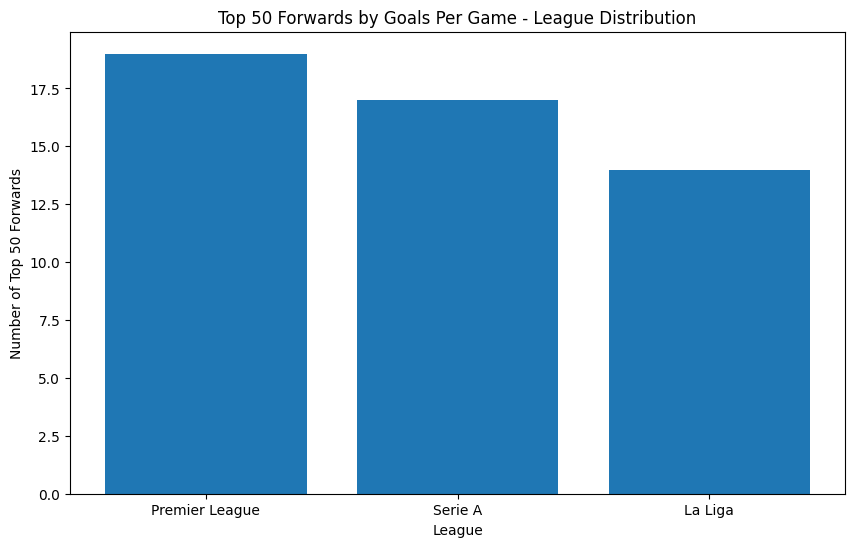

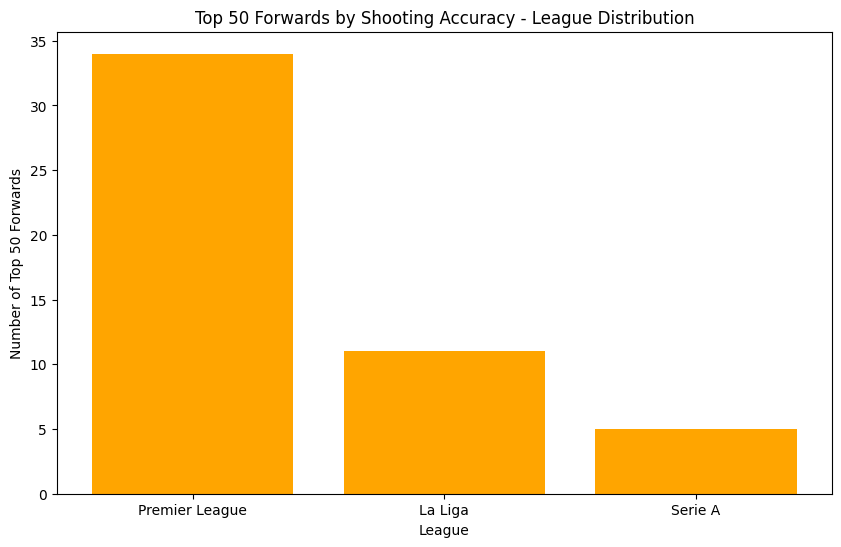

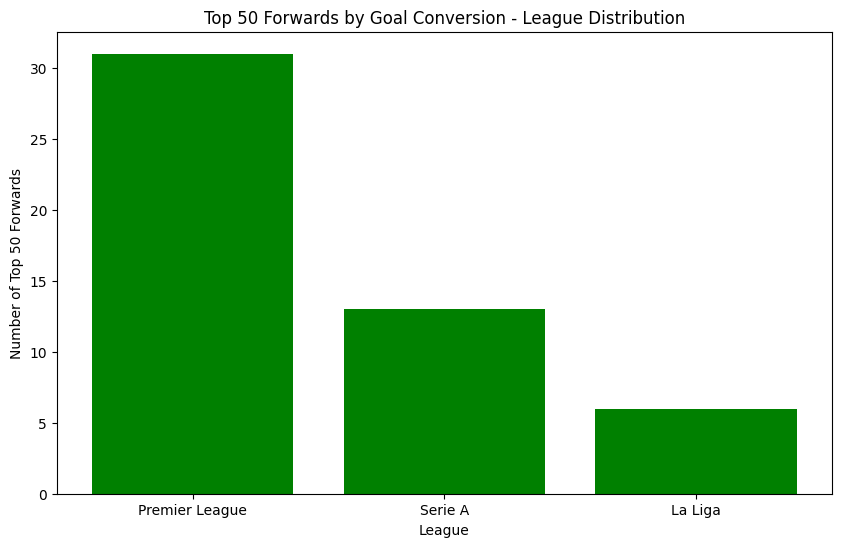

In [ ]:

plt.figure(figsize=(10, 6))
league_counts = top_50_forwards['League'].value_counts()
plt.bar(league_counts.index, league_counts.values)
plt.xlabel('League')
plt.ylabel('Number of Top 50 Forwards')
plt.title('Top 50 Forwards by Goals Per Game - League Distribution')
plt.show()


plt.figure(figsize=(10, 6))
league_counts = top_50_accuracy['League'].value_counts()
plt.bar(league_counts.index, league_counts.values, color='orange')
plt.xlabel('League')
plt.ylabel('Number of Top 50 Forwards')
plt.title('Top 50 Forwards by Shooting Accuracy - League Distribution')
plt.show()


plt.figure(figsize=(10, 6))
league_counts = top_50_conversion['League'].value_counts()
plt.bar(league_counts.index, league_counts.values, color='green')
plt.xlabel('League')
plt.ylabel('Number of Top 50 Forwards')
plt.title('Top 50 Forwards by Goal Conversion - League Distribution')
plt.show()

The bar graphs illustrate the distribution of the top 50 strikers in the Premier League, La Liga and Serie A according to three main indicators: goals per match, shot accuracy and goal conversion. The first graph shows that the Premier League and Serie A have a similar number of top strikers in terms of goals per game, with La Liga lagging slightly further behind, indicating a competitive balance in terms of goal frequency. The second graph, focusing on shot accuracy, shows a clear dominance of the Premier League, suggesting that strikers in that league are more accurate with shots than those in La Liga and Serie A. Finally, the third graph, which analyzes conversion of finishes. goals. , further increases the Premier League's efficiency as its forwards not only shoot accurately but also consistently convert those shots into goals. These visualizations reveal the distinct strengths of each league and provide valuable insights into the comparative performance of attackers across Europe's top competitions.

These charts are extremely useful for analyzing players from different leagues as they provide a clear and comparative view of key performance indicators. By breaking down the top 50 forwards by goals per game, shot accuracy and goal conversion, the charts allow us to see which leagues consistently produce high-scoring players in each category. This helps identify areas in which each league excels, such as whether it favors prolific scorers, accurate shooters, or efficient finishers. Additionally, a visual comparison can highlight differences in playing styles or tactical approaches between leagues. For example, a league that dominates shooting accuracy might emphasize precision and preparation, while a league that excels in goal conversion might focus on creating high-quality opportunities. Overall, this information helps teams, analysts and scouts better understand player performance and league dynamics, allowing them to make more informed decisions when evaluating talent or planning strategy.

#**Exploratory Data Analysis**

The measurements we performed, along with the data tables and visualizations, are extremely valuable for future analysis of the performance of attackers in different leagues. By systematically filtering, sorting and calculating key metrics such as goals per match, shot accuracy and goal conversion, we have created a comprehensive framework for comparing strikers from the Premier League, La Liga and Serie A. This allows us to identify not only the most prolific top scorers, but also those who maximize their chances and demonstrate exceptional efficiency.

Data tables provide detailed analysis of each player's performance, offering insights beyond the raw number of goals. Metrics like shot accuracy help us identify players who consistently hit the target, while goal conversion highlights those who capitalize on their opportunities. These parameters are crucial for evaluating the quality of a striker, as they reveal different aspects of his game, from precision to finishing ability. By ranking and ranking players based on these metrics, we can focus on the highest quality players in each league.

The bar charts we created further enhance our understanding by providing a league-wide perspective. They show how each league compares in terms of producing the best forwards by different measures. For example, the Premier League's dominance in shooting accuracy and goal conversion suggests a greater concentration of clinical finishers, while Serie A and La Liga also contribute significant numbers of attackers. This comparative analysis is essential to identify league-specific trends and characteristics that can influence an attacker's performance.

In the future, this approach could be a powerful tool for scouts, analysts and teams trying to find the best attackers. Whether identifying transfer targets, planning game strategies or evaluating a player's potential integration into a team, this information provides a data-driven basis for making informed decisions. By continually updating and refining this analysis, we can keep an eye on emerging talent and ensure we are always looking for the highest quality forwards in Europe's top leagues.

In [ ]:
# Sort the combined DataFrame by Goals_Per_Game and reset index
gpg_combined_df = gpg_combined_df.sort_values('Goal_Per_Game', ascending=False).reset_index(drop=True)

# Assign values based on Goals_Per_Game rank
gpg_combined_df['Value'] = (gpg_combined_df['Goal_Per_Game'] * 100000000)
# Display the sorted DataFrame with new pricing
gpg_combined_df

,PLAYER,League,Goal_Per_Game,Value
0,Messi,La Liga,1.058824,1.058824e+08
1,Ciro Immobile,Serie A,0.972973,9.729730e+07
2,Cristiano Ronaldo,Serie A,0.939394,9.393939e+07
3,Iago Aspas,La Liga,0.740741,7.407407e+07
4,Sergio Leonel Agüero del Castillo,Premier League,0.666667,6.666667e+07
...,...,...,...,...
459,André Filipe Tavares Gomes,Premier League,0.000000,0.000000e+00
460,Mason Holgate,Premier League,0.000000,0.000000e+00
461,Lucas Digne,Premier League,0.000000,0.000000e+00
462,Diego Rico,Premier League,0.000000,0.000000e+00


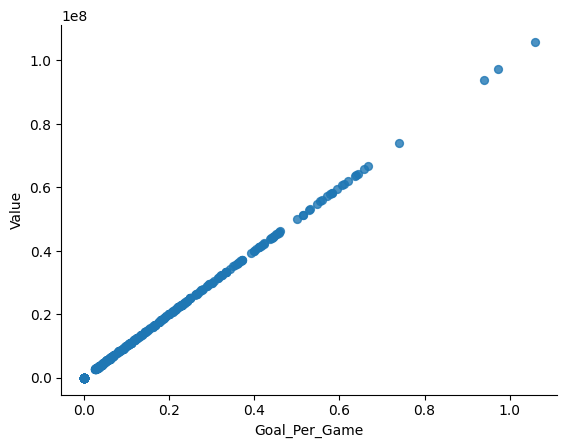

In [ ]:
gpg_combined_df.plot(kind='scatter', x='Goal_Per_Game', y='Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In this section of the analysis, the combined DataFrame of player statistics from the Premier League, La Liga, and Serie A is sorted by the Goal_Per_Game metric in descending order. This allows for a clear ranking of players based on their scoring efficiency. After sorting, the index is reset to provide a clean, sequential order for the ranked players. To further enhance the analysis, a new column, Value, is calculated by assigning a monetary value to each player based on their Goal_Per_Game metric. Specifically, the value is determined by multiplying Goal_Per_Game by 100,000,000, creating a hypothetical financial measure of each player’s performance efficiency. This approach enables a direct comparison of players' scoring output with a standardized valuation, making it easier to identify high-performing and potentially undervalued strikers in the dataset.

#**Conclusion**

The result of this Premier League Striker Stats project is that I have sorted out some areas that could be developed so they could tell me what you are looking for and what you can read. First, I would be talking about how external factors (team tactics and formations) affect striker performance. The players in a 4--3-3 team are, for example, more likely to score than defensive 5-4-1 strikers. Adding team-level statistics such as assists could show some players – who is midfield solid or who you are more proficient in your skill. I’d also like to consider how injuries and managerial changes affect players’ performance: a calendar analysis for what happens before and after these events.

Another improvement area is changing trends with time. By comparison strikers in 2019/2020 season to the scores in 2022/2023, I could detect player improved or reduced. At the same time, ranking teams’ averages of stats such as Shooting_Accuracy and Goal_Conversion across different seasons would make more than the overall number of strikers. And I’d analyse consistency in a list of those who keep top performers year after year (versus those who have short time of success).

More than that, I would class strikers as performance targets according to Goals_Per_Game. More than 0.65 goals per game, for example, could be considered elite whereas those of 0.45 to 0.65 are very successful players and those less than 0.45 may need improvement. And I would count group players with their plays style metrics (like Shots and Shooting_Accuracy), to identify poachers, short-range scorers and smart forwards. This would be better than that I would do on their role and trace patterns.

Visualisations are another aspect I’d amplify. Comparison histograms of the size of Goals_Per_Game over seasons would mark game shifts. The heatmaps of Shooting_Accuracy and Goal_Conversion would help identify clusters of dependable scorers while bar charts rank top-stars for league were the best-to-bottom line. Also, timelines charts that monitor the performance of each player in several seasons would be useful for how they’d developed and grow, et al when it’s called on injury or transfer.

I’d also make a financial perspective into the analysis. Using Value_Per_Goal or Value_Per_Point, I could test strikers’ financial value. Using transfer fee or salaries as part of contributions on goals and assist would help clubs be more than happy with the return of investments.

In the second instance, I’d broaden the scope with looking at league-specific trends. If, for example, the slow-paced, high-scoring style of the Premier League were compared to the Serie A defensive role, we would see how league play determinates striker performance. And with predictive modeling I could estimate players’ ability to perform in future seasons as a matter of time, age and team.

Eventually, these improvements would let me explain what I could and should give actionable suggestions. For example, I could identifie poor players for clubs to see in transfers or suggest certain striker styles that correspond to tactical goals. Combining more accurate analysis, better visualisations and financial parameters, the work might eventually be a whole test of striker performances in leagues, for not only analysts but for fans and football-makers.

In [3]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/PremierLeagueStrikerStats.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/PremierLeagueStrikerStats.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 633214 bytes to /content/drive/MyDrive/PremierLeagueStrikerStats.html


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
